# Bunch commands for pyTao

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pytao import Tao

# Initialize Tao on the CSR beam tracking example

In [3]:
tao=Tao('-init $ACC_ROOT_DIR/bmad-doc/tao_examples/csr_beam_tracking/tao.init -noplot')   

## bunch_params

In [4]:
?tao.bunch_params

Signature:
tao.bunch_params(
    ele_id,
    *,
    which='model',
    verbose=False,
    as_dict=True,
    raises=True,
)
Docstring:
Outputs bunch parameters at the exit end of a given lattice element.

Parameters
----------
ele_id
which : default=model

Returns
-------
string_list

Notes
-----
Command syntax:
  python bunch_params {ele_id}|{which}

Where:
  {ele_id} is an element name or index.
  {which} is one of: "model", "base" or "design"

Example:
  python bunch_params end|model  ! parameters at model lattice element named "end".

Examples
--------
Example: 1
 init: -init $ACC_ROOT_DIR/regression_tests/python_test/csr_beam_tracking/tao.init
 args:
   ele_id: end
   which: model
File:      ~/Code/GitHub/pytao/pytao/interface_commands.py
Type:      method


In [5]:
# The beam is saved at the end. 
stats = tao.bunch_params('end')
stats

{'beta_x': 0.301344571428823,
 'alpha_x': -2.1521049823636,
 'gamma_x': 18.6880945902302,
 'phi_x': 0.0,
 'eta_x': -0.0481905457368048,
 'etap_x': -0.454939694855219,
 'sigma_x': 6.05450515292117e-05,
 'sigma_p_x': 0.00047679256976393,
 'emit_x': 1.21644907930281e-08,
 'norm_emit_x': 9.99743443648932e-07,
 'beta_y': 0.407832041478316,
 'alpha_y': 1.94408133131883,
 'gamma_y': 11.7191680316676,
 'phi_y': 0.0,
 'eta_y': -0.0457301218789386,
 'etap_y': 0.026397863550129,
 'sigma_y': 7.04344819184428e-05,
 'sigma_p_y': 0.00037756614304414,
 'emit_y': 1.21643611549909e-08,
 'norm_emit_y': 9.99732789296032e-07,
 'beta_z': 95.8242406857742,
 'alpha_z': -1.2405916961693,
 'gamma_z': 0.026497134111715,
 'phi_z': 0.0,
 'eta_z': 0.0,
 'etap_z': 0.0,
 'sigma_z': 0.000899458444756647,
 'sigma_p_z': 1.4956943815202e-05,
 'emit_z': 8.44280620492465e-09,
 'norm_emit_z': 6.93875337076139e-07,
 'beta_a': 0.248534917541785,
 'alpha_a': -1.77502770288414,
 'gamma_a': 15.4139103949766,
 'phi_a': 0.0,
 'eta

In [6]:
stats['beam_saved']

True

## bunch1

In [7]:
?tao.bunch1

Signature:
tao.bunch1(
    ele_id,
    coordinate,
    *,
    which='model',
    ix_bunch='1',
    verbose=False,
    as_dict=True,
    raises=True,
)
Docstring:
Outputs Bunch parameters at the exit end of a given lattice element.

Parameters
----------
ele_id
coordinate
which : default=model
ix_bunch : default=1

Returns
-------
real_array
    if coordinate != 'state'
integer_array
    if coordinate == 'state'

Notes
-----
Command syntax:
  python bunch1 {ele_id}|{which} {ix_bunch} {coordinate}

Where:
  {ele_id} is an element name or index.
  {which} is one of: "model", "base" or "design"
  {ix_bunch} is the bunch index.
  {coordinate} is one of: x, px, y, py, z, pz, "s", "t", "charge", "p0c", "state"

For example, if {coordinate} = "px", the phase space px coordinate of each particle
of the bunch is displayed. The "state" of a particle is an integer. A value of 1 means
alive and any other value means the particle has been lost.

Examples
--------
Example: 1
 init: -init $ACC_ROOT_DI

In [8]:
tao.bunch1('end', 'state')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
xdat = tao.cmd_real('python bunch1 1@0>>8|model 1 x')
pxdat = tao.cmd_real('python bunch1 1@0>>8|model 1 px')
ydat = tao.cmd_real('python bunch1 1@0>>8|model 1 y')
pydat = tao.cmd_real('python bunch1 1@0>>8|model 1 py')
zdat = tao.cmd_real('python bunch1 1@0>>8|model 1 z')
pzdat = tao.cmd_real('python bunch1 1@0>>8|model 1 pz')
chargedat = tao.cmd_real('python bunch1 1@0>>8|model 1 charge')
p0cdat = tao.cmd_real('python bunch1 1@0>>8|model 1 p0c')
state = tao.cmd_integer('python bunch1 1@0>>8|model 1 state') # integers
# Unique p0C (eV), charge (pC)
set(p0cdat), sum(chargedat)*1e12

({41996891.31439491}, 77.0000000000011)

## Plot in matplotlib

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
xdata = 1000*xdat
ydata = 1000*pxdat
weights = chargedat

/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/ipykernel_35688/764024792.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  mycmap.set_under(color='white') # map 0 to this color


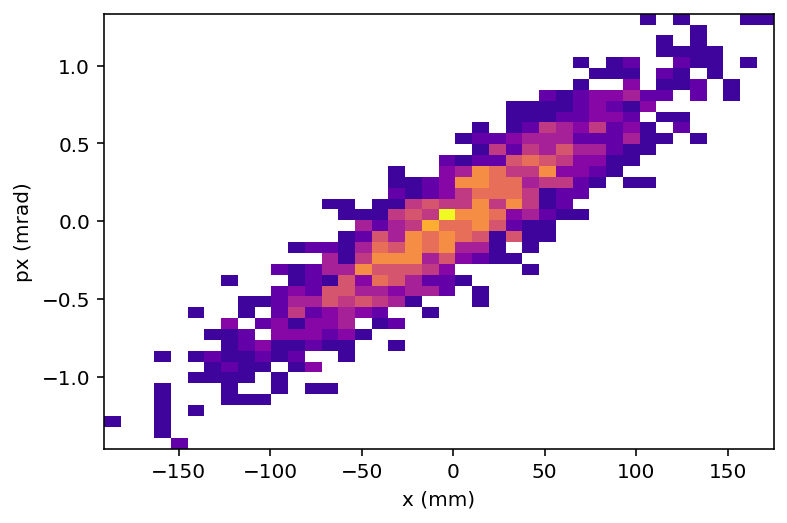

In [12]:
# hist2d

mycmap = plt.get_cmap('plasma') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1e-30 # something tiny
# Bin particles
plt.hist2d(x=1000*xdata, y=ydata,  bins=2*[40], weights=weights, cmap=mycmap, vmin=myvmin)
plt.xlabel('x (mm)')
plt.ylabel('px (mrad)')
plt.show()

/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/ipykernel_35688/3059256223.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mycmap.set_under(color='white') # map 0 to this color


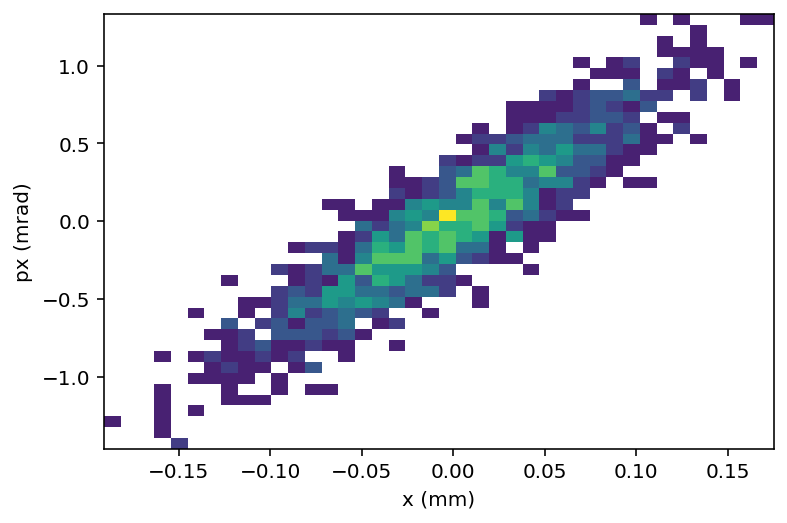

In [13]:
# Numpy histogram 2d, with custom color map

import matplotlib.colors as colors

mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)

xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

image = np.flip(H.T, axis=0) # 
imax = np.max(image)
norm=colors.Normalize(vmin=1e-12*imax, vmax=imax)
plt.xlabel('x (mm)')
plt.ylabel('px (mrad)')
plt.imshow(image, cmap=mycmap, norm=norm, extent=[xmin, xmax, ymin, ymax], aspect='auto')

In [14]:
np.min(image), np.max(image)

(0.0, 8.469999999999999e-13)

## Plot in Bokeh

In [15]:
from bokeh.plotting import figure, show, output_notebook
from bokeh import palettes, colors
from bokeh.models import ColumnDataSource, HoverTool
output_notebook(verbose=False, hide_banner=True)

pal = palettes.Viridis[256]
#white=colors.named.white
#pal[0] = white # replace 0 with white

In [16]:
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)
xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

In [17]:
ds = ColumnDataSource(data=dict(image=[H.transpose()]))   
p = figure(x_range=[xmin, xmax], y_range=[ymin, ymax], title='Bunch at end', 
           x_axis_label='x (mm)', y_axis_label='px (mrad)',
           plot_width=500, plot_height=500)
p.image(image='image', source=ds, 
    x=xmin, y=ymin, dw=xmax-xmin, dh=ymax-ymin, palette=pal)
show(p)

## Data for ParticleGroup

The above commands have been packaged into two functions for easier use, and to easily create ParticleGroup objects

In [18]:
data = tao.bunch_data('end')
data.keys()

dict_keys(['x', 'px', 'y', 'py', 't', 'pz', 'status', 'weight', 'z', 'species'])

In [19]:
from pmd_beamphysics import ParticleGroup

P = ParticleGroup(data=data)
P

<ParticleGroup with 1000 particles at 0x120f38f40>

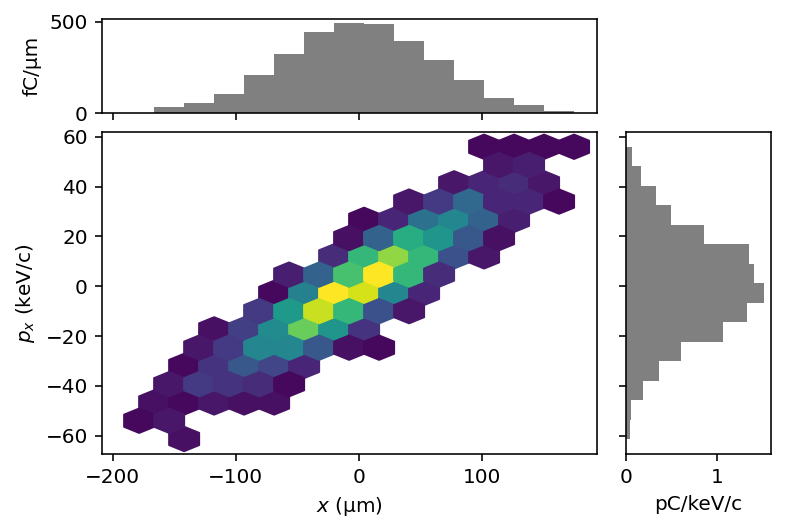

In [20]:
P.plot('x', 'px')

In [21]:
P.twiss('xy')

{'alpha_x': -2.152104982363587,
 'beta_x': 0.30134283265220524,
 'gamma_x': 18.688202422301625,
 'emit_x': 1.2176737721010553e-08,
 'eta_x': -0.04819026767388646,
 'etap_x': -0.4549396948467144,
 'norm_emit_x': 1.0007499622253205e-06,
 'alpha_y': 1.944081331318836,
 'beta_y': 0.4078296882624822,
 'gamma_y': 11.719235652374397,
 'emit_y': 1.2176607952456657e-08,
 'eta_y': -0.045729858012809266,
 'etap_y': 0.026397863550355127,
 'norm_emit_y': 1.0007392971458563e-06}